> ## 제주도 호텔 (데이터 정제 및 시각화)

> ### #01. 작업준비

#### 필요한 패키지 설치

In [9]:
import pandas as pd
from pandas import DataFrame, melt, read_excel
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import folium
from os import path, mkdir
import base64

import bs4
import requests
import json
import simplejson

import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import time

from IPython.display import SVG

#### 데이터 불러오기

In [10]:
hotel = pd.read_excel("C:/Users/hanjieun_2/Desktop/데이터분석/data_analysis/세미_프로젝트2/제주특별자치도_관광숙박업현황_20221122.xlsx")
hotel

,구분,상호명,소재지,객실수,연락처,비고,데이터기준일자
0,관광호텔업,(주)호텔하니크라운,제주특별자치도 제주시 삼성로 10,61,064-758-4200,특이사항없음,2022-11-22
1,관광호텔업,글래드호텔앤리조트㈜ 메종글래드제주,제주특별자치도 제주시 노연로 80,513,064-747-5000,특이사항없음,2022-11-22
2,관광호텔업,제주썬호텔,제주특별자치도 제주시 삼무로 67,203,064-741-8000,특이사항없음,2022-11-22
3,관광호텔업,제주로얄호텔,제주특별자치도 제주시 신대로12길 45,126,064-743-2222,특이사항없음,2022-11-22
4,관광호텔업,제주팔레스호텔,제주특별자치도 제주시 탑동로 9,94,064-753-8811,특이사항없음,2022-11-22
...,...,...,...,...,...,...,...
416,휴양콘도미니엄업,ES제주리조트,제주특별자치도 서귀포시 1100로 501,153,NaN,특이사항없음,2022-11-22
417,휴양콘도미니엄업,씨사이드아덴,제주특별자치도 서귀포시 중문관광로 124,190,064-738-9636,특이사항없음,2022-11-22
418,휴양콘도미니엄업,백통신원리조트 기린,제주특별자치도 서귀포시 남원읍 서성로 427-1,76,064-745-7077,특이사항없음,2022-11-22
419,휴양콘도미니엄업,스프링데일 골프&리조트 휴양콘도미니엄 1,제주특별자치도 서귀포시 남원읍 서성로 459-1,56,064-800-8000,특이사항없음,2022-11-22


In [11]:
# 데이터 프레임으로 만들기
hotel_df = DataFrame(hotel)
hotel_df

,구분,상호명,소재지,객실수,연락처,비고,데이터기준일자
0,관광호텔업,(주)호텔하니크라운,제주특별자치도 제주시 삼성로 10,61,064-758-4200,특이사항없음,2022-11-22
1,관광호텔업,글래드호텔앤리조트㈜ 메종글래드제주,제주특별자치도 제주시 노연로 80,513,064-747-5000,특이사항없음,2022-11-22
2,관광호텔업,제주썬호텔,제주특별자치도 제주시 삼무로 67,203,064-741-8000,특이사항없음,2022-11-22
3,관광호텔업,제주로얄호텔,제주특별자치도 제주시 신대로12길 45,126,064-743-2222,특이사항없음,2022-11-22
4,관광호텔업,제주팔레스호텔,제주특별자치도 제주시 탑동로 9,94,064-753-8811,특이사항없음,2022-11-22
...,...,...,...,...,...,...,...
416,휴양콘도미니엄업,ES제주리조트,제주특별자치도 서귀포시 1100로 501,153,NaN,특이사항없음,2022-11-22
417,휴양콘도미니엄업,씨사이드아덴,제주특별자치도 서귀포시 중문관광로 124,190,064-738-9636,특이사항없음,2022-11-22
418,휴양콘도미니엄업,백통신원리조트 기린,제주특별자치도 서귀포시 남원읍 서성로 427-1,76,064-745-7077,특이사항없음,2022-11-22
419,휴양콘도미니엄업,스프링데일 골프&리조트 휴양콘도미니엄 1,제주특별자치도 서귀포시 남원읍 서성로 459-1,56,064-800-8000,특이사항없음,2022-11-22


**************************

> ### #02. 데이터 전처리

#### 필요한 컬럼 추출
###### 가정 : 모두 호텔로 취급

In [12]:
# 필요한 컬럼만 추출
hotel_df = hotel_df.filter(['구분','상호명','소재지','객실수'])
hotel_df

,구분,상호명,소재지,객실수
0,관광호텔업,(주)호텔하니크라운,제주특별자치도 제주시 삼성로 10,61
1,관광호텔업,글래드호텔앤리조트㈜ 메종글래드제주,제주특별자치도 제주시 노연로 80,513
2,관광호텔업,제주썬호텔,제주특별자치도 제주시 삼무로 67,203
3,관광호텔업,제주로얄호텔,제주특별자치도 제주시 신대로12길 45,126
4,관광호텔업,제주팔레스호텔,제주특별자치도 제주시 탑동로 9,94
...,...,...,...,...
416,휴양콘도미니엄업,ES제주리조트,제주특별자치도 서귀포시 1100로 501,153
417,휴양콘도미니엄업,씨사이드아덴,제주특별자치도 서귀포시 중문관광로 124,190
418,휴양콘도미니엄업,백통신원리조트 기린,제주특별자치도 서귀포시 남원읍 서성로 427-1,76
419,휴양콘도미니엄업,스프링데일 골프&리조트 휴양콘도미니엄 1,제주특별자치도 서귀포시 남원읍 서성로 459-1,56


********************

> ### #03. 시각화

#### 제주도의 시별로 호텔의 수 막대그래프로 시각화

In [13]:
# 소재지의 공백을 찾기
hotel_df['소재지']

# split
address_split = hotel_df['소재지'].str.split(' ')
address_split


# 시 컬럼 추가
# address_split한 값에서 1번째 문자만 추출
hotel_df['시'] = address_split.str.get(1)
hotel_df

,구분,상호명,소재지,객실수,시
0,관광호텔업,(주)호텔하니크라운,제주특별자치도 제주시 삼성로 10,61,제주시
1,관광호텔업,글래드호텔앤리조트㈜ 메종글래드제주,제주특별자치도 제주시 노연로 80,513,제주시
2,관광호텔업,제주썬호텔,제주특별자치도 제주시 삼무로 67,203,제주시
3,관광호텔업,제주로얄호텔,제주특별자치도 제주시 신대로12길 45,126,제주시
4,관광호텔업,제주팔레스호텔,제주특별자치도 제주시 탑동로 9,94,제주시
...,...,...,...,...,...
416,휴양콘도미니엄업,ES제주리조트,제주특별자치도 서귀포시 1100로 501,153,서귀포시
417,휴양콘도미니엄업,씨사이드아덴,제주특별자치도 서귀포시 중문관광로 124,190,서귀포시
418,휴양콘도미니엄업,백통신원리조트 기린,제주특별자치도 서귀포시 남원읍 서성로 427-1,76,서귀포시
419,휴양콘도미니엄업,스프링데일 골프&리조트 휴양콘도미니엄 1,제주특별자치도 서귀포시 남원읍 서성로 459-1,56,서귀포시


In [14]:
# 결측치 확인
hotel_df['시'].isna().sum()

0

In [15]:
# 시명의 빈도를 value로 가진 데이터 프레임
si_df = DataFrame(hotel_df['시'].value_counts())
si_df

,count
시,
서귀포시,218
제주시,203


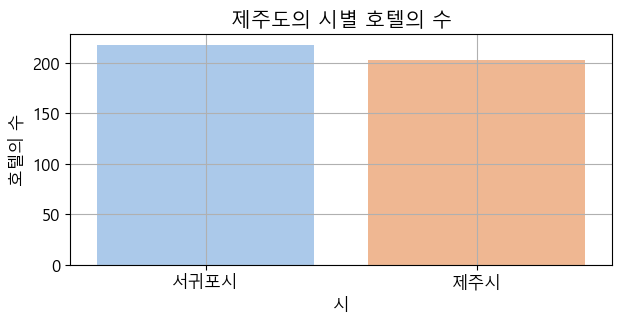

In [16]:
# 시 별 호텔의 수 그래프로 시각화

# 1) 그래프 전역 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (7,3)
plt.rcParams['axes.unicode_minus'] = False

# 2) 그래프 그리기
sb.barplot(data=si_df, x=si_df.index, y='count', palette='pastel')

plt.title("제주도의 시별 호텔의 수")
plt.xlabel("시")
plt.ylabel("호텔의 수")
plt.grid()
plt.show()
plt.close()

분석결과 : 제주도에는 제주시보다 서귀포시에 호텔의 수가 많다. 

#### 제주도 숙박 구분 그래프 (파이그래프)

In [17]:
# 구분 컬럼 = 파이그래프의 labels
labels = list(hotel_df['구분'].unique())
labels

['관광호텔업', '한국전통호텔업', '가족호텔업', '호스텔업', '소형호텔업', '휴양콘도미니엄업']

In [18]:
# 파이그래프의 데이터
data = list(hotel_df['구분'].value_counts())

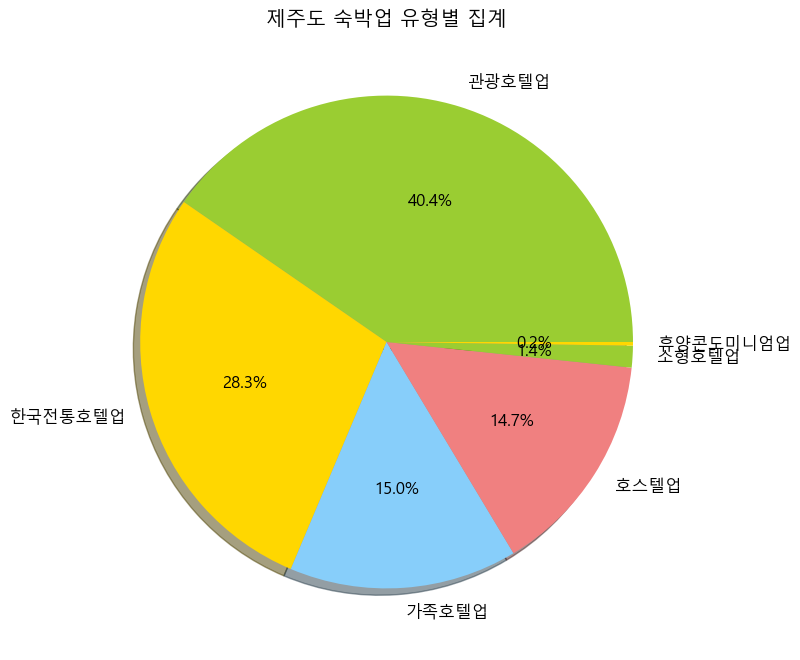

In [19]:
# 1) 그래프 전역 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['axes.unicode_minus'] = False

# 2) 파이그래프로 시각화

#데이터
data = list(hotel_df['구분'].value_counts())

# 각 데이터별 레이블
labels = list(hotel_df['구분'].unique())

# 각 데이터별 색상
colors = ['yellowgreen','gold','lightskyblue','lightcoral']

# 각 데이터별 확대비율
# explode = (0,0.0,0,0)

plt.figure()
plt.title("제주도 숙박업 유형별 집계")
plt.pie(data, labels=labels, colors=colors,
        autopct='%0.1f%%', startangle=0, shadow=True)
# plt.savefig('pie chart.png')
plt.show()
plt.close()

분석결과 : 제주도 숙박업을 유형별로 구분했을 때 관광호텔업 > 한국전통호텔업 > 가족호텔업 순으로 많았다.

#### 제주도 숙소 유형별 객실수 분포 (hue파라미터 사용한 막대그래프)

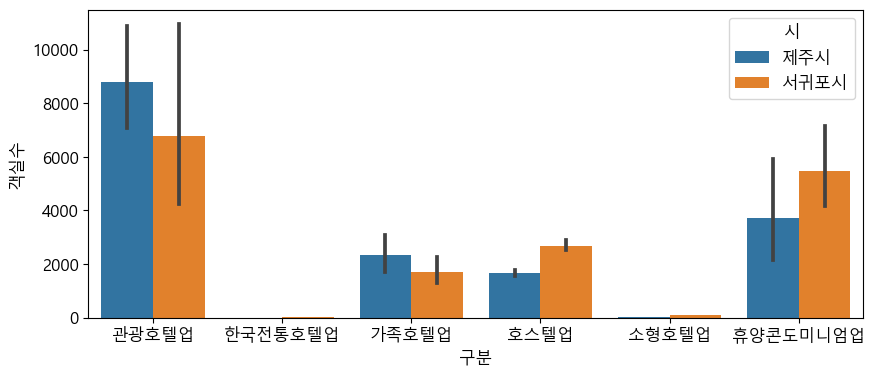

In [20]:
# 1) 그래프 전역 설정
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

# 2) hue파라미터 사용하여 범주에 따라 구분 시각화 
sb.barplot(data=hotel_df, x='구분', y='객실수', hue='시', estimator='sum')
plt.show()
plt.close()

분석결과 : 제주도의 제주시가 서귀포시보다 관광호텔업 유형이 많았지만, 휴양콘도미니엄업과 호스텔업의 경우 서귀포시가 제주시보다 많았다. <br> 

***********************************************

> ### #04. 데이터 합치기

### 야놀자 호텔 데이터

#### - Selenium을 이용한 수집

In [21]:
url='https://www.yanolja.com/hotel/r-900584?advert=AREA&topAdvertiseMore=1&region=900584'

In [22]:
# 필요한 패키지 설치
import numpy as np
import pandas as pd
import chromedriver_autoinstaller
import selenium
from selenium.webdriver.common.by import  By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver import Chrome
import bs4
from selenium.webdriver.common.keys import Keys
import time

In [23]:
# 객체 생성
driver=Chrome()
driver.get('https://www.yanolja.com/hotel/r-900584?advert=AREA&topAdvertiseMore=1&region=900584')

In [24]:
# 날짜는 수작업으로 설정 : 2023.07.20~2023.07.26 / 성인 2명 

In [25]:
# 스크롤내리기 작업
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(0.5)
    before_height = int(driver.execute_script("return document.body.scrollHeight"))
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(0.5)
    height = int(driver.execute_script("return document.body.scrollHeight"))
    if before_height==height:
        break

In [26]:
# html 불러오기
A=bs4.BeautifulSoup(driver.page_source)
data1=list(map(lambda x:x.attrs["title"],A.select(".PlaceListItemBanner_container__ARsIm.banner-unit a")))
data2=list(map(lambda x:x.attrs["title"],A.select('.PlaceListItemText_container__fUIgA.text-unit a')))

In [27]:
# 데이터 추출
y_hotellist=data1+data2
y_hotellist

['까사로마 호텔 서귀포',
 '신신호텔 제주 공항점',
 '호텔위드시티',
 '신신호텔 제주 천지연',
 '제주 노블피아 호텔',
 '그랜드 하얏트 제주',
 '그랜드 조선 제주',
 '제주 더나인스테이',
 '랜딩관 제주신화월드 호텔앤리조트',
 '윈스토리 호텔 서귀포',
 '제주 호텔 더 엠',
 '제주 벨룸 리조트',
 '히든 클리프 호텔 앤 네이쳐',
 '신신호텔 제주 서귀포',
 '힐스테이트 제주',
 '타마라 호텔 제주',
 '신화관 제주신화월드 호텔앤리조트',
 '호텔 컬리넌 제주',
 '호텔 앨리스 앤 트렁크',
 '함덕비치스테이제주',
 '서머셋 제주신화월드',
 '비스타케이호텔 월드컵',
 '엠버 퓨어힐 호텔&리조트',
 '호텔 휘슬락 바이 베스트웨스턴 시그니처 컬렉션',
 '호텔 골든데이지 서귀포 오션',
 '제주 부영호텔&리조트',
 '라마다 제주시티 호텔',
 '라마다 프라자 제주',
 '신신호텔 제주오션(구. 제주 오션팰리스)',
 '제주 센트럴 시티 호텔',
 '제주 웨스턴그레이스 서귀포',
 '빠레브 호텔 제주',
 '메종 글래드 제주',
 '신신호텔 제주 월드컵',
 '캠퍼트리 호텔&리조트 제주',
 '코델리아S호텔',
 '브라운 스위트 제주',
 '파크 선샤인 제주',
 '호텔 화인 제주',
 '웨이스톤 서우봉 호텔',
 '호텔 에어시티 제주',
 '롯데 시티호텔 제주',
 '아시아호텔 제주',
 '제주 샹그릴라 호텔앤리조트',
 '호텔 리젠트마린',
 '헤이 서귀포',
 '신라스테이 제주',
 '베스트웨스턴 제주',
 '제주 디아일랜드 블루',
 '제주 씨스테이 호텔 앤 스파',
 '호텔 아길라',
 '그라벨 호텔',
 '아스타 호텔',
 '제주 블룸호텔',
 '호텔 더 그랑 제주 중문점',
 '제주 글래즈 하임',
 '호텔 징크 서귀포',
 '더 스테이 센추리 호텔',
 '블루하와이호텔',
 '호텔 스카이파크 제주 1호점',
 '스위트 호텔 제주',
 '제주 엠스테이',
 '호텔 윈 스카이',
 '스위트 메이 호텔 서귀포'

In [28]:
# 공공데이터와 합치기
# 1) 공공데이터 호텔명 리스트
data = list(hotel_df['상호명'])
len(data)

421

In [29]:
# 2) 만약 공공데이터 호텔리스트에 야놀자호텔 크롤링 데이터가 없다면 추가 
for y in y_hotellist:
    if y not in data:
        data.append(y)
len((data)) #755 => 

759

In [30]:
# 3) data => 공공데이터 + 야놀자 크롤링 호텔리스트
data

['(주)호텔하니크라운',
 '글래드호텔앤리조트㈜ 메종글래드제주',
 '제주썬호텔',
 '제주로얄호텔',
 '제주팔레스호텔',
 '제주서울관광호텔',
 '펄호텔 제주',
 '제주아일랜드호텔리조트',
 '제주오리엔탈호텔',
 '삼해인관광호텔',
 '호텔 스카이파크',
 '제주퍼시픽호텔',
 '스타즈호텔 제주 로베로',
 '메이더호텔',
 '금룡관광호텔',
 '코쿤애월',
 '라마다프라자제주호텔',
 '오션그랜드호텔',
 '(주)블랙스톤리조트',
 '호텔라온제주',
 '파크사이드관광호텔',
 '애플관광호텔',
 '관광호텔 더레드',
 '엠버시티호텔',
 '퓨어스테이호텔',
 '올레관광호텔',
 '로긴호텔',
 '엠버호텔',
 '해호텔',
 '롯데시티호텔 제주',
 '엠버호텔 센트럴',
 '씨앤제이관광호텔',
 '제주미주호텔',
 '호텔 컬리넌',
 '골든파크관광호텔',
 '오라관광호텔',
 '씨앤관광호텔',
 '팜파스호텔 제주',
 '스탠포드호텔앤리조트 제주A',
 '스탠포드호텔앤리조트 제주',
 '그라벨 호텔',
 'HOTEL LEO',
 '아이진호텔',
 '아스타호텔',
 '심스호텔',
 '케이 관광호텔',
 '애월비치호텔',
 '유니호텔',
 '사하라 호텔',
 '신라스테이제주',
 '제니아관광호텔',
 '제주갤럭시호텔',
 '베니키아호텔제주',
 '해마 호텔',
 '에스호텔',
 '블랙샌즈관광호텔',
 '호텔더원',
 '제주인관광호텔',
 '제주코아관광호텔',
 '하버호텔',
 '탐라스테이',
 '스카이힐비즈니스 관광호텔',
 '슬림관광호텔',
 '인덱스 제이드림호텔',
 '어반아일랜드호텔',
 '더스테이센추리호텔',
 '오드리 인',
 '스위트캐슬',
 '호텔난타',
 '(주)호텔샬롬',
 '제주레슬리호텔',
 '제주노블레스 관광호텔',
 '호텔 시리우스',
 '다인오세아노호텔',
 '시티홀관광호텔제주',
 '그랜드하얏트 제주',
 '아루미호텔 협재점',
 '에코랜드 호텔',
 '(주)호텔신라 제주신라',
 '㈜호텔롯데 롯데호텔 제주',
 '파르나스 호텔

### 마이리얼트립 호텔

#### - Selenium을 이용한 수집

In [31]:
url='https://accommodation.myrealtrip.com/union/products?checkIn=2023-07-20&checkOut=2023-07-26&adultCount=2&childCount=0&childAges=&infantCount=0&infantAges=&regionId=&keyword=%EC%A0%9C%EC%A3%BC%EB%8F%84&roomCount=1'

In [32]:
# 필요한 패키지 설치 (야놀자 참조)

In [33]:
# 객체 생성
driver=Chrome()

In [34]:
# get 요청
driver.get(url)

In [35]:
# 스크롤 내리기
point=WebDriverWait(driver,1).until(lambda x:x.find_element(By.CSS_SELECTOR,"body"))

In [36]:
result=[]
while True:
    for i in range(2):
        point.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    M=bs4.BeautifulSoup(driver.page_source).select('.css-1xdhyk6 .e12a3oa10.css-121peml')
    Now=list(set(sum([result,M],[])))
    print(Now)
    if Now==result:
        break
    result=Now

[<span class="e12a3oa10 css-121peml">메종 글래드 제주</span>, <span class="e12a3oa10 css-121peml">제주 웨스턴 그레이스 호텔</span>, <span class="e12a3oa10 css-121peml">브라운 스위트 제주 호텔 앤 리조트</span>, <span class="e12a3oa10 css-121peml">서머셋제주신화월드</span>, <span class="e12a3oa10 css-121peml">그랜드 하얏트 제주</span>, <span class="e12a3oa10 css-121peml">베스트 웨스턴 제주 호텔</span>, <span class="e12a3oa10 css-121peml">신라스테이 제주</span>, <span class="e12a3oa10 css-121peml">신화 제주신화월드 호텔앤리조트</span>, <span class="e12a3oa10 css-121peml">롯데 호텔 제주</span>, <span class="e12a3oa10 css-121peml">해비치 호텔 &amp; 리조트 제주</span>, <span class="e12a3oa10 css-121peml">파르나스 호텔 제주</span>, <span class="e12a3oa10 css-121peml">랜딩관 제주신화월드 호텔앤리조트</span>, <span class="e12a3oa10 css-121peml">그랜드 조선 제주</span>, <span class="e12a3oa10 css-121peml">제주신라호텔</span>]
[<span class="e12a3oa10 css-121peml">파르나스 호텔 제주</span>, <span class="e12a3oa10 css-121peml">베스트 웨스턴 제주 호텔</span>, <span class="e12a3oa10 css-121peml">브라운 스위트 제주 호텔 앤 리조트</span>, <span class="e12a3oa10 c

In [37]:
m_hotellist = []
for r in result:
    m_hotellist.append(r.text)
len(set(m_hotellist)) 

248

In [38]:
# 마이리얼트립 호텔리스트 m_hotellist를 공공데이터+야놀자데이터에 append
for m in m_hotellist:
    if m not in data:
        data.append(m)

len(data) #921개 


938

In [39]:
# 총 호텔 데이터 리스트 = data
data

# 공백과 띄어쓰기 제거한 최종 데이터 = pre_data
pre_data=[]
for d in data:
    pre_data.append(d.strip().replace(" ",''))
pre_data

['(주)호텔하니크라운',
 '글래드호텔앤리조트㈜메종글래드제주',
 '제주썬호텔',
 '제주로얄호텔',
 '제주팔레스호텔',
 '제주서울관광호텔',
 '펄호텔제주',
 '제주아일랜드호텔리조트',
 '제주오리엔탈호텔',
 '삼해인관광호텔',
 '호텔스카이파크',
 '제주퍼시픽호텔',
 '스타즈호텔제주로베로',
 '메이더호텔',
 '금룡관광호텔',
 '코쿤애월',
 '라마다프라자제주호텔',
 '오션그랜드호텔',
 '(주)블랙스톤리조트',
 '호텔라온제주',
 '파크사이드관광호텔',
 '애플관광호텔',
 '관광호텔더레드',
 '엠버시티호텔',
 '퓨어스테이호텔',
 '올레관광호텔',
 '로긴호텔',
 '엠버호텔',
 '해호텔',
 '롯데시티호텔제주',
 '엠버호텔센트럴',
 '씨앤제이관광호텔',
 '제주미주호텔',
 '호텔컬리넌',
 '골든파크관광호텔',
 '오라관광호텔',
 '씨앤관광호텔',
 '팜파스호텔제주',
 '스탠포드호텔앤리조트제주A',
 '스탠포드호텔앤리조트제주',
 '그라벨호텔',
 'HOTELLEO',
 '아이진호텔',
 '아스타호텔',
 '심스호텔',
 '케이관광호텔',
 '애월비치호텔',
 '유니호텔',
 '사하라호텔',
 '신라스테이제주',
 '제니아관광호텔',
 '제주갤럭시호텔',
 '베니키아호텔제주',
 '해마호텔',
 '에스호텔',
 '블랙샌즈관광호텔',
 '호텔더원',
 '제주인관광호텔',
 '제주코아관광호텔',
 '하버호텔',
 '탐라스테이',
 '스카이힐비즈니스관광호텔',
 '슬림관광호텔',
 '인덱스제이드림호텔',
 '어반아일랜드호텔',
 '더스테이센추리호텔',
 '오드리인',
 '스위트캐슬',
 '호텔난타',
 '(주)호텔샬롬',
 '제주레슬리호텔',
 '제주노블레스관광호텔',
 '호텔시리우스',
 '다인오세아노호텔',
 '시티홀관광호텔제주',
 '그랜드하얏트제주',
 '아루미호텔협재점',
 '에코랜드호텔',
 '(주)호텔신라제주신라',
 '㈜호텔롯데롯데호텔제주',
 '파르나스호텔제주',
 '㈜교원프라퍼티스위트호텔제주',
 '서귀포

### OPEN API 이용한 pre_data의 주소 도출

In [40]:
# OPEN API 이용한 pre_data의 주소 도출

url = "https://dapi.kakao.com/v2/local/search/keyword.json?"
key = "19111005ad4c10663591e0a55b344ba5"
query = pre_data

Data = []
for q in pre_data: 
    r = requests.get(url, params={'query':q}, headers={"Authorization": "KakaoAK 19111005ad4c10663591e0a55b344ba5"})
    js = simplejson.JSONEncoder().encode(r.json())
    result = r.json()
    Data.append(result['documents'])
Data

[[{'address_name': '제주특별자치도 제주시 이도일동 1315',
   'category_group_code': 'AD5',
   'category_group_name': '숙박',
   'category_name': '여행 > 숙박 > 호텔',
   'distance': '',
   'id': '25021636',
   'phone': '010-2653-0324',
   'place_name': '하니크라운호텔',
   'place_url': 'http://place.map.kakao.com/25021636',
   'road_address_name': '제주특별자치도 제주시 삼성로 10',
   'x': '126.527585956294',
   'y': '33.5049734525842'},
  {'address_name': '제주특별자치도 제주시 이도1동 1315',
   'category_group_code': 'PK6',
   'category_group_name': '주차장',
   'category_name': '교통,수송 > 교통시설 > 주차장',
   'distance': '',
   'id': '17580690',
   'phone': '',
   'place_name': '호텔하니크라운 주차장',
   'place_url': 'http://place.map.kakao.com/17580690',
   'road_address_name': '제주특별자치도 제주시 삼성로 10',
   'x': '126.527921003137',
   'y': '33.5051081652306'},
  {'address_name': '제주특별자치도 제주시 이도1동 1315',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '가정,생활 > 결혼 > 예식장',
   'distance': '',
   'id': '21510669',
   'phone': '',
  

In [47]:
# place_name과 address_name만 추출한 데이터 = processing_Data  
processing_Data=list(map(lambda x: (x[0]["place_name"],x[0]['address_name']) if x else None,Data))

In [48]:
# processing_Data를 데이터프레임으로 만든후 컬럼 재정의 & '숙박'xlsx으로 저장
totalData = pd.DataFrame(data=[x for x in processing_Data if x]).rename(columns={0:"place_name",1:"address_name"}).to_excel("숙박2.xlsx")
totalData

### 데이터 전처리

In [49]:
totalData = pd.read_excel("./숙박2.xlsx")
totalData

,Unnamed: 0,place_name,address_name
0,0,하니크라운호텔,제주특별자치도 제주시 이도일동 1315
1,1,제주썬호텔&카지노,제주특별자치도 제주시 연동 291-30
2,2,제주로얄호텔,제주특별자치도 제주시 연동 272-34
3,3,제주팔레스호텔,제주특별자치도 제주시 삼도2동 1192-18
4,4,펄호텔 제주,제주특별자치도 제주시 연동 277-1
...,...,...,...
812,812,바이더힐펜션,제주특별자치도 제주시 애월읍 유수암리 2049-1
813,813,제주담스파빌,제주특별자치도 제주시 한림읍 금능리 1803-2
814,814,소서제주 745,제주특별자치도 제주시 애월읍 유수암리 719-9
815,815,브라운캐빈,제주특별자치도 제주시 애월읍 상가리 54-2


In [50]:
# 제주도가 아닌 주소를 가진 곳들 
이상_df= totalData[~totalData['address_name'].str.contains('제주특별자치도')]
이상_df

,Unnamed: 0,place_name,address_name
16,16,블랙스톤벨포레리조트,충북 증평군 도안면 연촌리 산 58
31,31,호텔컬리넌,서울 종로구 낙원동 142
58,58,오드리,경기 남양주시 별내동 2184-11
87,87,호텔캘리포니아,경기 김포시 구래동 6883-8
157,157,J2헤어,경기 과천시 별양동 14
158,158,아모르하우스,서울 강남구 역삼동 633-31
167,167,썬하우스,충남 태안군 안면읍 승언리 1944-27
182,182,라인호텔명동,서울 중구 을지로2가 199-13
192,192,제이하우스,경기 평택시 청룡동 397-36
198,198,화이트캐슬,인천 남동구 구월동 1466-1


In [51]:
# 제주특별자치도에 위치하지 않은 호텔은 삭제 + 원본에 적용
totalData.drop(index=이상_df.index, axis=0, inplace=True)
totalData

,Unnamed: 0,place_name,address_name
0,0,하니크라운호텔,제주특별자치도 제주시 이도일동 1315
1,1,제주썬호텔&카지노,제주특별자치도 제주시 연동 291-30
2,2,제주로얄호텔,제주특별자치도 제주시 연동 272-34
3,3,제주팔레스호텔,제주특별자치도 제주시 삼도2동 1192-18
4,4,펄호텔 제주,제주특별자치도 제주시 연동 277-1
...,...,...,...
812,812,바이더힐펜션,제주특별자치도 제주시 애월읍 유수암리 2049-1
813,813,제주담스파빌,제주특별자치도 제주시 한림읍 금능리 1803-2
814,814,소서제주 745,제주특별자치도 제주시 애월읍 유수암리 719-9
815,815,브라운캐빈,제주특별자치도 제주시 애월읍 상가리 54-2


In [53]:
totalData.to_excel('./숙박3-1.xlsx')

In [54]:
# 주소를 통해 행정구역 별 이름 구분
# 1) totalData 확인
pd.read_excel('./숙박3-1.xlsx')

,Unnamed: 0.1,Unnamed: 0,place_name,address_name
0,0,0,하니크라운호텔,제주특별자치도 제주시 이도일동 1315
1,1,1,제주썬호텔&카지노,제주특별자치도 제주시 연동 291-30
2,2,2,제주로얄호텔,제주특별자치도 제주시 연동 272-34
3,3,3,제주팔레스호텔,제주특별자치도 제주시 삼도2동 1192-18
4,4,4,펄호텔 제주,제주특별자치도 제주시 연동 277-1
...,...,...,...,...
789,812,812,바이더힐펜션,제주특별자치도 제주시 애월읍 유수암리 2049-1
790,813,813,제주담스파빌,제주특별자치도 제주시 한림읍 금능리 1803-2
791,814,814,소서제주 745,제주특별자치도 제주시 애월읍 유수암리 719-9
792,815,815,브라운캐빈,제주특별자치도 제주시 애월읍 상가리 54-2


In [55]:
# 2) 주소 별 행정구역 리스트 만들기
district_list = []
for t in totalData['address_name']:
     district_list.append(t.strip().split(' ')[2][:2]) 
district_list

['이도',
 '연동',
 '연동',
 '삼도',
 '연동',
 '성산',
 '삼도',
 '연동',
 '연동',
 '용담',
 '삼도',
 '구좌',
 '연동',
 '애월',
 '삼도',
 '조천',
 '한림',
 '연동',
 '이도',
 '이도',
 '노형',
 '연동',
 '삼도',
 '용담',
 '연동',
 '용담',
 '연동',
 '노형',
 '이도',
 '연동',
 '안덕',
 '내도',
 '용담',
 '애월',
 '애월',
 '외도',
 '연동',
 '연동',
 '삼도',
 '건입',
 '연동',
 '애월',
 '애월',
 '삼도',
 '연동',
 '용담',
 '애월',
 '연동',
 '도두',
 '연동',
 '내도',
 '건입',
 '애월',
 '연동',
 '연동',
 '애월',
 '조천',
 '오등',
 '이도',
 '노형',
 '용담',
 '연동',
 '애월',
 '노형',
 '한림',
 '조천',
 '색달',
 '색달',
 '색달',
 '토평',
 '표선',
 '회수',
 '서귀',
 '서귀',
 '서귀',
 '서귀',
 '안덕',
 '남원',
 '서귀',
 '강정',
 '강정',
 '하예',
 '색달',
 '안덕',
 '서홍',
 '서귀',
 '중문',
 '중문',
 '서귀',
 '대포',
 '표선',
 '중문',
 '하예',
 '삼도',
 '상예',
 '성산',
 '색달',
 '성산',
 '성산',
 '안덕',
 '색달',
 '구좌',
 '용담',
 '애월',
 '애월',
 '노형',
 '도두',
 '해안',
 '애월',
 '용담',
 '한림',
 '해안',
 '용담',
 '한림',
 '애월',
 '애월',
 '도두',
 '한림',
 '애월',
 '한림',
 '한림',
 '한림',
 '대정',
 '대포',
 '대포',
 '색달',
 '대포',
 '안덕',
 '성산',
 '성산',
 '성산',
 '성산',
 '법환',
 '강정',
 '성산',
 '성산',
 '성산',
 '성산',
 '색달',
 '서귀',
 '성산',
 '성산',
 '토평',

In [56]:
len(district_list)

794

In [57]:
totalData['행정구역'] = district_list

In [58]:
totalData

,Unnamed: 0,place_name,address_name,행정구역
0,0,하니크라운호텔,제주특별자치도 제주시 이도일동 1315,이도
1,1,제주썬호텔&카지노,제주특별자치도 제주시 연동 291-30,연동
2,2,제주로얄호텔,제주특별자치도 제주시 연동 272-34,연동
3,3,제주팔레스호텔,제주특별자치도 제주시 삼도2동 1192-18,삼도
4,4,펄호텔 제주,제주특별자치도 제주시 연동 277-1,연동
...,...,...,...,...
812,812,바이더힐펜션,제주특별자치도 제주시 애월읍 유수암리 2049-1,애월
813,813,제주담스파빌,제주특별자치도 제주시 한림읍 금능리 1803-2,한림
814,814,소서제주 745,제주특별자치도 제주시 애월읍 유수암리 719-9,애월
815,815,브라운캐빈,제주특별자치도 제주시 애월읍 상가리 54-2,애월


In [59]:
# svg 파일의 행정구역 g id 확인
path_id = ['구좌', '조천', '동제주', '중제주', '서제주', 
        '애월', '성산', '한림', '표선', '남원', '한경', '안덕', 
        '동서귀', '중서귀', '서서귀', '대정']

# g_id에 따라 district_list 구분
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}






In [60]:
구분 = []
for a in totalData['행정구역']:
    try : 
        구분.append(행정구역[a])
    except:
        구분.append('N')
구분

['중제주',
 '서제주',
 '서제주',
 '중제주',
 '서제주',
 '성산',
 '중제주',
 '서제주',
 '서제주',
 '중제주',
 '중제주',
 '구좌',
 '서제주',
 '애월',
 '중제주',
 '조천',
 '한림',
 '서제주',
 '중제주',
 '중제주',
 '서제주',
 '서제주',
 '중제주',
 '중제주',
 '서제주',
 '중제주',
 '서제주',
 '서제주',
 '중제주',
 '서제주',
 '안덕',
 '서제주',
 '중제주',
 '애월',
 '애월',
 '서제주',
 '서제주',
 '서제주',
 '중제주',
 '중제주',
 '서제주',
 '애월',
 '애월',
 '중제주',
 '서제주',
 '중제주',
 '애월',
 '서제주',
 '서제주',
 '서제주',
 '서제주',
 '중제주',
 '애월',
 '서제주',
 '서제주',
 '애월',
 '조천',
 '중제주',
 '중제주',
 '서제주',
 '중제주',
 '서제주',
 '애월',
 '서제주',
 '한림',
 '조천',
 '서서귀',
 '서서귀',
 '서서귀',
 'N',
 '표선',
 '서서귀',
 '동서귀',
 '동서귀',
 '동서귀',
 '동서귀',
 '안덕',
 '남원',
 '동서귀',
 '중서귀',
 '중서귀',
 '서서귀',
 '서서귀',
 '안덕',
 '중서귀',
 '동서귀',
 '서서귀',
 '서서귀',
 '동서귀',
 '서서귀',
 '표선',
 '서서귀',
 '서서귀',
 '중제주',
 '서서귀',
 '성산',
 '서서귀',
 '성산',
 '성산',
 '안덕',
 '서서귀',
 '구좌',
 '중제주',
 '애월',
 '애월',
 '서제주',
 '서제주',
 '서제주',
 '애월',
 '중제주',
 '한림',
 '서제주',
 '중제주',
 '한림',
 '애월',
 '애월',
 '서제주',
 '한림',
 '애월',
 '한림',
 '한림',
 '한림',
 '대정',
 '서서귀',
 '서서귀',
 '서서귀',
 '서서귀',
 '안덕',
 '성산',
 '성산',
 '성산'

In [61]:
totalData['id'] = 구분

In [62]:
totalData

,Unnamed: 0,place_name,address_name,행정구역,id
0,0,하니크라운호텔,제주특별자치도 제주시 이도일동 1315,이도,중제주
1,1,제주썬호텔&카지노,제주특별자치도 제주시 연동 291-30,연동,서제주
2,2,제주로얄호텔,제주특별자치도 제주시 연동 272-34,연동,서제주
3,3,제주팔레스호텔,제주특별자치도 제주시 삼도2동 1192-18,삼도,중제주
4,4,펄호텔 제주,제주특별자치도 제주시 연동 277-1,연동,서제주
...,...,...,...,...,...
812,812,바이더힐펜션,제주특별자치도 제주시 애월읍 유수암리 2049-1,애월,애월
813,813,제주담스파빌,제주특별자치도 제주시 한림읍 금능리 1803-2,한림,한림
814,814,소서제주 745,제주특별자치도 제주시 애월읍 유수암리 719-9,애월,애월
815,815,브라운캐빈,제주특별자치도 제주시 애월읍 상가리 54-2,애월,애월


>### 05. SVG 지도시각화 : 행정구역별 호텔수 색상 표현

#### 필요한 패키지 설치

In [63]:
from IPython.display import SVG
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import os

#### 최종 호텔 데이터 가져오기

In [64]:
totalData

,Unnamed: 0,place_name,address_name,행정구역,id
0,0,하니크라운호텔,제주특별자치도 제주시 이도일동 1315,이도,중제주
1,1,제주썬호텔&카지노,제주특별자치도 제주시 연동 291-30,연동,서제주
2,2,제주로얄호텔,제주특별자치도 제주시 연동 272-34,연동,서제주
3,3,제주팔레스호텔,제주특별자치도 제주시 삼도2동 1192-18,삼도,중제주
4,4,펄호텔 제주,제주특별자치도 제주시 연동 277-1,연동,서제주
...,...,...,...,...,...
812,812,바이더힐펜션,제주특별자치도 제주시 애월읍 유수암리 2049-1,애월,애월
813,813,제주담스파빌,제주특별자치도 제주시 한림읍 금능리 1803-2,한림,한림
814,814,소서제주 745,제주특별자치도 제주시 애월읍 유수암리 719-9,애월,애월
815,815,브라운캐빈,제주특별자치도 제주시 애월읍 상가리 54-2,애월,애월


#### svg 파일 불러오기

In [79]:
map_file_path = "./제주map.svg"

if os.path.exists(map_file_path):
    with open(map_file_path, 'r',encoding='utf-8') as f: 
        map_svg = f.read() 

    print(map_svg) 

<?xml version="1.0" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg xmlns="http://www.w3.org/2000/svg" xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
    xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 1428 864" version="1.1">
    <g id="구좌" inkscape:label="구좌">
        <path fill="#eeeeee" stroke="#000000" stroke-width="0.3" stroke-linejoin="round"
            stroke-linecap="round" stroke-miterlimit="4" stroke-dasharray="none" stroke-opacity="1"
            fill-opacity="1"
            d="M 1004,69 L 1005,69 L 1005,68 L 1005,67 L 1006,67 L 1006,68 L 1006,67 L 1006,68 L 1006,67 L 1007,67 L 1007,68 L 1008,68 L 1008,67 L 1008,68 L 1008,69 L 1009,69 L 1009,68 L 1010,68 L 1010,69 L 1011,69 L 1012,69 L 1013,69 L 1014,69 L 1015,69 L 1015,68 L 1016,68 L 1016,67 L 1015,67 L 1015,66 L 1016,66 L 1016,67 L 1017,67 L 1017,66 L 1016,66 L 1017,66 L 1017,65 L 1018,65 L 1018,66 L 1017,66 L 1017,67 L 1018,6

In [ ]:
SVG(map_svg)

#### 이미지 지도와 파싱(parsing)

In [80]:
# svg파일의 내용을 BeautifulSoup객체로 변환한 후 id속성을 갖는 path 태그만 추출
soup = BeautifulSoup(map_svg,'html.parser')
soup

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" standalone="no"?><!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<html><body><svg version="1.1" viewbox="0 0 1428 864" xmlns="http://www.w3.org/2000/svg" xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape" xmlns:xlink="http://www.w3.org/1999/xlink">
<g id="구좌" inkscape:label="구좌">
<path d="M 1004,69 L 1005,69 L 1005,68 L 1005,67 L 1006,67 L 1006,68 L 1006,67 L 1006,68 L 1006,67 L 1007,67 L 1007,68 L 1008,68 L 1008,67 L 1008,68 L 1008,69 L 1009,69 L 1009,68 L 1010,68 L 1010,69 L 1011,69 L 1012,69 L 1013,69 L 1014,69 L 1015,69 L 1015,68 L 1016,68 L 1016,67 L 1015,67 L 1015,66 L 1016,66 L 1016,67 L 1017,67 L 1017,66 L 1016,66 L 1017,66 L 1017,65 L 1018,65 L 1018,66 L 1017,66 L 1017,67 L 1018,67 L 1019,67 L 1020,67 L 1021,67 L 1021,68 L 1020,68 L 1019,68 L 1020,68 L 1021,68 L 1022,68 L 1023,68 L 1024,68 L 1024,69 L 1024,70 L 1025,70 L 1025,71 L 1024,71 L 1023,71 L 1024,71 L 1024,72 L 1023,72 L 1023,73 L 1024,73

In [166]:
# 행정구역 별 추출
path_id = soup.select('g')

#출력결과는 id 단위를 저장한 리스트
path_id

[<g fill="#ffeecc" id="구좌" inkscape:label="구좌" style="fill: #ffeecc;">
 <path d="M 1004,69 L 1005,69 L 1005,68 L 1005,67 L 1006,67 L 1006,68 L 1006,67 L 1006,68 L 1006,67 L 1007,67 L 1007,68 L 1008,68 L 1008,67 L 1008,68 L 1008,69 L 1009,69 L 1009,68 L 1010,68 L 1010,69 L 1011,69 L 1012,69 L 1013,69 L 1014,69 L 1015,69 L 1015,68 L 1016,68 L 1016,67 L 1015,67 L 1015,66 L 1016,66 L 1016,67 L 1017,67 L 1017,66 L 1016,66 L 1017,66 L 1017,65 L 1018,65 L 1018,66 L 1017,66 L 1017,67 L 1018,67 L 1019,67 L 1020,67 L 1021,67 L 1021,68 L 1020,68 L 1019,68 L 1020,68 L 1021,68 L 1022,68 L 1023,68 L 1024,68 L 1024,69 L 1024,70 L 1025,70 L 1025,71 L 1024,71 L 1023,71 L 1024,71 L 1024,72 L 1023,72 L 1023,73 L 1024,73 L 1025,72 L 1025,73 L 1026,73 L 1026,72 L 1026,73 L 1026,74 L 1027,74 L 1028,74 L 1029,74 L 1029,75 L 1030,75 L 1031,75 L 1031,76 L 1032,76 L 1033,76 L 1034,77 L 1035,77 L 1036,77 L 1036,78 L 1037,78 L 1037,79 L 1038,79 L 1038,80 L 1039,80 L 1039,81 L 1040,81 L 1039,81 L 1039,82 L 1039,81

In [182]:
for p in path_id:
    print(p['id'],'---->',p['fill'])

구좌 ----> #ffeecc
조천 ----> #ffd480
동제주 ----> #ffeecc
중제주 ----> #e69900
서제주 ----> #e69900
애월 ----> #ffaa00
성산 ----> #ffaa00
한림 ----> #ffbb33
표선 ----> #ffeecc
남원 ----> #ffeecc
한경 ----> #ffeecc
동서귀 ----> #ffaa00
안덕 ----> #ffd480
중서귀 ----> #ffaa00
서서귀 ----> #e69900
대정 ----> #ffeecc


#### 색상값 

In [175]:
# 색상값 리스트 만들기 (단계별 5개 색상 준비)
colors = ['#ffeecc', '#ffd480', '#ffbb33', '#ffaa00', '#e69900']

In [176]:
# id별 호텔수의 갯수
totalData['id'].value_counts()

id
서제주    130
중제주     91
서서귀     87
동서귀     81
애월      80
중서귀     68
성산      66
한림      43
안덕      39
조천      24
N       19
대정      19
구좌      13
표선      12
남원      12
한경       8
동제주      2
Name: count, dtype: int64

In [177]:
# 행정구역별 호텔의 수 데이터프레임
count = pd.DataFrame(totalData['id'].value_counts())
count.rename(columns={'count':'호텔수'},inplace=True)

In [178]:
# 색상값이 저장될 변수 추가
count['색상값'] = None
count

,호텔수,색상값
id,,
서제주,130,None
중제주,91,None
서서귀,87,None
동서귀,81,None
애월,80,None
중서귀,68,None
성산,66,None
한림,43,None
안덕,39,None


In [185]:
# svg 이미지의 면 색상 변경(fill)
for p in path_id:
    # print(p)

    id = p['id']
    # print(id)
    호텔수 = count.loc[id, '호텔수']
    # print(id, 호텔수)
    
    # 호텔수에 따라 단계값 설정(단계는 색상값의 수에 따름)
    if  호텔수> 85 : color_index = 4
    elif 호텔수> 65 : color_index = 3
    elif  호텔수> 40 : color_index = 2
    elif  호텔수> 20 : color_index = 1
    else :             color_index = 0

    # # 각 행정구역별 색상값을 데이터 프레임에 변환
    count.loc[id, '색상값'] = colors[color_index]
    # # svg 이미지의 면 색상 변경
    p['fill'] = colors[color_index]
   
    

In [180]:
count

,호텔수,색상값
id,,
서제주,130,#e69900
중제주,91,#e69900
서서귀,87,#e69900
동서귀,81,#ffaa00
애월,80,#ffaa00
중서귀,68,#ffaa00
성산,66,#ffaa00
한림,43,#ffbb33
안덕,39,#ffd480


#### 이미지 출력

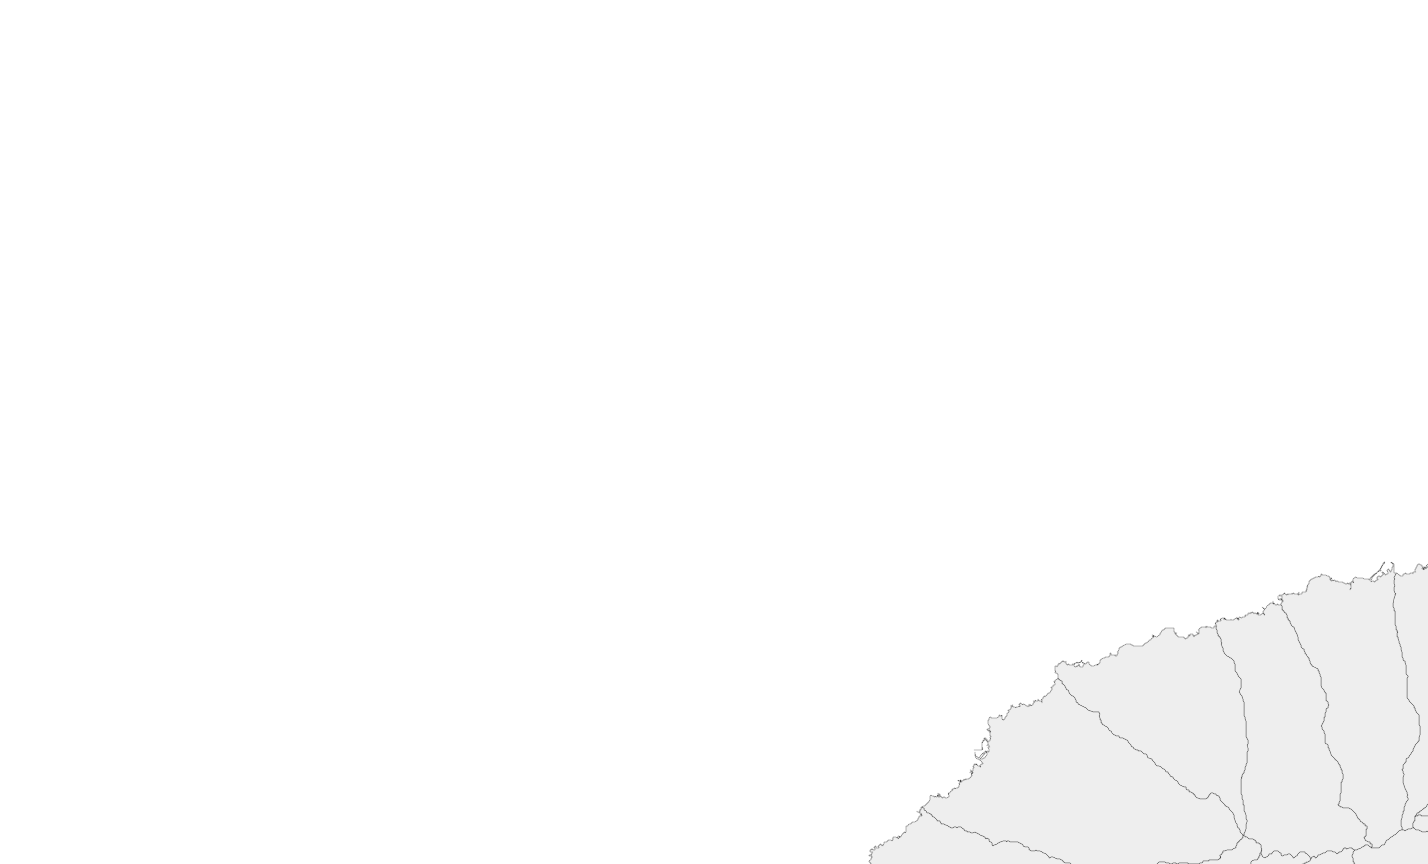

In [181]:
# bs4 객체의 내용을 문자열로 리턴
jeju_hotel_svg = soup.prettify()

# 출력
SVG(jeju_hotel_svg)

In [107]:
# 저장
with open('jeju_hotel.svg.svg', 'w', encoding='utf-8') as f:
    f.write(jeju_hotel_svg)